# Pseudo-random number sequences classifier

The following notebook applies the language models fitted in [prng_deepzoom_lm.ipynb](prng_deepzoom_lm.ipynb) for the classification of the sequence samples generated with deep-zoom method as described in Machicao, J., & Bruno, O. M. (2017). Improving the pseudo-randomness properties of chaotic maps using deep-zoom. Chaos: An Interdisciplinary Journal of Nonlinear Science, 27(5), 53116.

## Dataset
Data consists of a training set and a test set, each with 100 sample files divided in 11 classes.

Each class corresponds to sequences generated with the deep zoom method using a different value of k, respectively from k=0 to k=10

Each sample file contains a sequence of one million digits produced using deep zoom with the corresponding value of k.

Files are in text format, using the following naming convention: /{Train|Test}/k{k}/k{k}-parte{0-99}.ser

## Classes and functions

In [1]:
import numpy as np
from RNNLanguageModel import *
from utilities import *
%matplotlib inline

class MultiClassSequenceClassifier(object):
  
  def __init__(self,
               models_dict = [{'k': 0, 'log_dir': '/tmp/RNNLanguageModel/k0'}, 
                              {'k': 1, 'log_dir': '/tmp/RNNLanguageModel/k1'}, 
                              {'k': 2, 'log_dir': '/tmp/RNNLanguageModel/k2'}, 
                              {'k': 3, 'log_dir': '/tmp/RNNLanguageModel/k3'}, 
                              {'k': 4, 'log_dir': '/tmp/RNNLanguageModel/k4'}, 
                              {'k': 5, 'log_dir': '/tmp/RNNLanguageModel/k5'}, 
                              {'k': 6, 'log_dir': '/tmp/RNNLanguageModel/k6'}, 
                              {'k': 9, 'log_dir': '/tmp/RNNLanguageModel/k9'}
                             ]
              ):
    self.models_dict = models_dict
    self._supported_models = [m['k'] for m in self.models_dict]
    np.random.seed(0)
    

  def predict_proba(self, x):
    x = np.array(x)
    if np.ndim(x) == 1:
      x = np.reshape(x, (1, -1))
    assert np.ndim(x) == 2

    sequence_size = x.shape[1]
    step_size = min(sequence_size, 32)
    num_samples = x.shape[0]
    batch_size = min(192, sequence_size // step_size)
    num_models = len(self._supported_models)
    
    log_probabilities = np.zeros((num_samples, num_models))
      
    for i in range(num_models):
      model_info = self.models_dict[i]
      model = RNNLanguageModel(step_size = step_size,
                               batch_size = batch_size,
                               log_dir = model_info['log_dir'])
      
      print('Evaluating data against model for k={}'.format(model_info['k']))
      log_probabilities[:,i] = model.predict_log_proba(x)
    
    y_probabilities = softmax(log_probabilities)

    return y_probabilities

      
  def predict(self, x):
    probabilities = self.predict_proba(x)
    indices = np.argmax(probabilities, 1)
    predictions = [self.models_dict[i]['k'] for i in indices]
    return (predictions, probabilities)
    


In [2]:
def sample_from_testset(ks = [0, 1, 2, 3, 4, 5, 6, 9], 
                   samples_per_k = 100,
                   sample_len = 100000
                  ):
  X = np.zeros((len(ks) * samples_per_k, sample_len))
  Y = np.zeros(len(ks) * samples_per_k)
  for i, k in enumerate(ks):
    data = load_data(k=k, path_pattern = 'data/DatasetKlogmap/Test/k%d/k%d-parte%d.ser', indices=range(samples_per_k))
    data = np.array(data)
    data = data.reshape((samples_per_k, -1))
    X[i * samples_per_k : (i + 1) * samples_per_k] = data[:,:sample_len]
    Y[i * samples_per_k : (i + 1) * samples_per_k] = k
  return X, Y

# Evaluation of the models on the classification task

* Evaluation is made on models trained for $k \in \{0, 1, 2, 3, 4, 5, 6, 9\}$
* Models were trained with only the first 20 files from the Train set, with the exception of k=4, which was allowed to train with the whole train set. 
* Evaluation is made with samples from the Test set. For this evaluation, only the first 100,000 digits from the first 10 test files for each class k are fed to the models for classification.

In [3]:
X_test, Y_test = sample_from_testset(samples_per_k = 10)

Loading data for k=0, indices= range(0, 10)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.18it/s]


Loading data for k=1, indices= range(0, 10)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.18it/s]


Loading data for k=2, indices= range(0, 10)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.22it/s]


Loading data for k=3, indices= range(0, 10)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.20it/s]


Loading data for k=4, indices= range(0, 10)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.17it/s]


Loading data for k=5, indices= range(0, 10)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.20it/s]


Loading data for k=6, indices= range(0, 10)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.20it/s]


Loading data for k=9, indices= range(0, 10)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.21it/s]


In [4]:
classifier = MultiClassSequenceClassifier()

In [5]:
(predictions, probabilities) = classifier.predict(X_test)

Evaluating data against model for k=0
INFO:tensorflow:Restoring parameters from /tmp/RNNLanguageModel/k0/checkpoints/20180129-000608-3256-3256


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [24:33<00:00, 18.42s/it]


Evaluating data against model for k=1
INFO:tensorflow:Restoring parameters from /tmp/RNNLanguageModel/k1/checkpoints/20180129-132650-3256-3256


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [24:38<00:00, 18.48s/it]


Evaluating data against model for k=2
INFO:tensorflow:Restoring parameters from /tmp/RNNLanguageModel/k2/checkpoints/20180201-173149-3256-3256


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [24:38<00:00, 18.48s/it]


Evaluating data against model for k=3
INFO:tensorflow:Restoring parameters from /tmp/RNNLanguageModel/k3/checkpoints/20180131-010735-8244-8244


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [24:36<00:00, 18.45s/it]


Evaluating data against model for k=4
INFO:tensorflow:Restoring parameters from /tmp/RNNLanguageModel/k4/checkpoints/20180131-051737-16277-16277


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [24:37<00:00, 18.47s/it]


Evaluating data against model for k=5
INFO:tensorflow:Restoring parameters from /tmp/RNNLanguageModel/k5/checkpoints/20180202-121506-3256-3256


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [24:41<00:00, 18.51s/it]


Evaluating data against model for k=6
INFO:tensorflow:Restoring parameters from /tmp/RNNLanguageModel/k6/checkpoints/20180129-064628-3256-3256


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [24:39<00:00, 18.49s/it]


Evaluating data against model for k=9
INFO:tensorflow:Restoring parameters from /tmp/RNNLanguageModel/k9/checkpoints/20180129-100630-3256-3256


100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [24:37<00:00, 18.47s/it]


In [7]:
import pandas as pd

class_names = ['k={}'.format(k) for k in [0, 1, 2, 3, 4, 5, 6, 9]]
results_table = pd.DataFrame(probabilities, columns=class_names)
results_table['Prediction'] = predictions
results_table['True label'] = Y_test
results_table

k=0       k=1       k=2       k=3       k=4       k=5       k=6  \
0   0.521270  0.017194  0.031538  0.021819  0.091882  0.106044  0.105136   
1   0.520485  0.017353  0.031890  0.022179  0.092153  0.105923  0.105023   
2   0.520967  0.017330  0.031584  0.021917  0.092007  0.106010  0.105106   
3   0.521055  0.017325  0.031485  0.021860  0.092127  0.105986  0.105095   
4   0.521008  0.017284  0.031781  0.022133  0.091768  0.105964  0.105043   
5   0.521337  0.016940  0.031552  0.021749  0.092084  0.106059  0.105148   
6   0.521113  0.017304  0.031571  0.021694  0.092189  0.105985  0.105082   
7   0.520845  0.017262  0.031844  0.021955  0.092078  0.105953  0.105048   
8   0.520879  0.017308  0.031899  0.022020  0.091896  0.105939  0.105041   
9   0.520754  0.017401  0.031932  0.021983  0.091830  0.105977  0.105077   
10  0.002528  0.527088  0.021347  0.022654  0.101962  0.108351  0.108066   
11  0.002543  0.527362  0.021404  0.022567  0.101778  0.108323  0.108039   
12  0.002599  0.527641  0.020985  0.022542  0.101978  0.108300  0.108006   
13  0.002544  0.527233  0.021460  0.022591  0.101990  0.108273  0.107990   
14  0.002546  0.527264  0.021263  0.023036  0.101697  0.108273  0.107985   
15  0.002500  0.527829  0.021206  0.022322  0.101950  0.108267  0.107994   
16  0.002556  0.527234  0.021371  0.022588  0.101979  0.108306  0.108016   
17  0.002545  0.527720  0.021098  0.022447  0.101804  0.108333  0.108058   
18  0.002570  0.527216  0.021400  0.022663  0.101864  0.108305  0.108022   
19  0.002509  0.527566  0.021226  0.022698  0.101874  0.108251  0.107970   
20  0.001625  0.005879  0.522925  0.022187  0.108966  0.112956  0.112768   
21  0.001609  0.005811  0.523149  0.022465  0.108884  0.112838  0.112659   
22  0.001609  0.005711  0.523499  0.022402  0.108676  0.112842  0.112664   
23  0.001625  0.005720  0.522602  0.022516  0.108912  0.113024  0.112829   
24  0.001640  0.005660  0.523028  0.022402  0.108990  0.112914  0.112717   
25  0.001616  0.005749  0.522743  0.022695  0.109025  0.112866  0.112690   
26  0.001636  0.005743  0.523157  0.022364  0.108850  0.112904  0.112706   
27  0.001632  0.005688  0.523122  0.022502  0.108928  0.112852  0.112669   
28  0.001605  0.005694  0.523328  0.022414  0.108907  0.112839  0.112641   
29  0.001617  0.005629  0.522802  0.022412  0.109167  0.112936  0.112751   
..       ...       ...       ...       ...       ...       ...       ...   
50  0.003019  0.011665  0.041797  0.042477  0.220299  0.226935  0.226910   
51  0.003010  0.011540  0.041705  0.043005  0.220536  0.226746  0.226732   
52  0.002987  0.011390  0.042297  0.042346  0.220583  0.226814  0.226807   
53  0.003047  0.011576  0.042233  0.042957  0.220320  0.226648  0.226621   
54  0.002960  0.011550  0.041929  0.042630  0.220215  0.226935  0.226904   
55  0.003049  0.011312  0.041735  0.042972  0.220278  0.226901  0.226886   
56  0.003024  0.011472  0.041766  0.042487  0.220252  0.227021  0.227006   
57  0.003022  0.011502  0.042187  0.042429  0.220470  0.226824  0.226795   
58  0.003053  0.011520  0.041444  0.042756  0.220578  0.226911  0.226897   
59  0.003041  0.011618  0.041561  0.042704  0.220490  0.226884  0.226869   
60  0.003051  0.011558  0.042296  0.042671  0.220328  0.226700  0.226716   
61  0.002990  0.011525  0.042110  0.042702  0.220403  0.226759  0.226772   
62  0.003008  0.011501  0.042194  0.042395  0.220568  0.226756  0.226789   
63  0.002960  0.011419  0.041990  0.042896  0.220671  0.226689  0.226693   
64  0.003081  0.011496  0.041917  0.042127  0.220647  0.226914  0.226921   
65  0.003050  0.011385  0.042026  0.042455  0.220515  0.226862  0.226859   
66  0.003050  0.011261  0.041548  0.042836  0.220718  0.226865  0.226865   
67  0.003003  0.011373  0.042041  0.042470  0.220620  0.226849  0.226828   
68  0.002990  0.011526  0.041858  0.042174  0.220574  0.226960  0.226962   
69  0.002984  0.011298  0.041727  0.042662  0.220643  0.226878  0.226894   
70  0.002980  0.011390  0.041797  0.042757  0.220419  0.2

In [6]:
from sklearn import metrics
print ( 'Accuracy  : ', metrics.accuracy_score(Y_test, predictions) )

Accuracy  :  0.8625


In [9]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions, target_names=class_names))

             precision    recall  f1-score   support

        k=0       1.00      1.00      1.00        10
        k=1       1.00      1.00      1.00        10
        k=2       1.00      1.00      1.00        10
        k=3       1.00      1.00      1.00        10
        k=4       1.00      1.00      1.00        10
        k=5       0.71      1.00      0.83        10
        k=6       0.50      0.50      0.50        10
        k=9       0.67      0.40      0.50        10

avg / total       0.86      0.86      0.85        80



[[10  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  3  5  2]
 [ 0  0  0  0  0  1  5  4]]


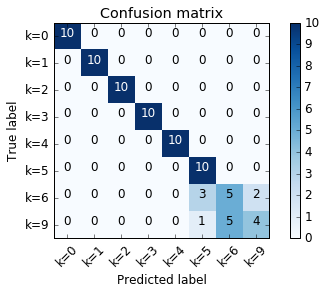

In [8]:
# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, predictions)
np.set_printoptions(precision=2)

print(cnf_matrix)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()


## Preliminary results and discussion

* Model for k=6 and k=9 were not considered to have trained succesfully. They both produced a perplexity of 10.00 and accuracy of 0.100, which intuitively implies that they did not reach to the point of detecting a pattern other than a uniform random distribution.
* As a consequence, confusion matrix results for k=6 and k=9 will be probably random (this could easily be verified).
* On the other side, for every other class that did capture a pattern, even just a couple of points above uniformly random guessing, accuracy gets to 100%
* Removing either k=6 or k=9 from the matrix would push accuracy to 100%
* Preliminary results are very encouraging, especially given that the models have been trained with only a fraction of the data, and that neither architecture nor the network hyperparameters have been tuned optimally.